In [11]:
import os
import glob
import torch
import numpy as np

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

import config
import dataset
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
image_files=glob.glob(os.path.join(config.DATA_DIR, "*.png"))
targets_orig=[x.split("/")[-1][:-4] for x in image_files]
targets=[[c for c in x] for x in  targets_orig]
targets_flat=[c for clist in targets for c  in clist ]

lbl_enc=preprocessing.LabelEncoder()
lbl_enc.fit(targets_flat)
targets_enc=[lbl_enc.transform(x) for x in targets]
targets_enc=np.array(targets_enc) + 1
print(targets_enc)
print(len(lbl_enc.classes_))

(
    train_imgs,
    test_imgs,
    train_targets,
    test_targets, 
    train_orig_targets,
    train_orig_targets,
) = model_selection.train_test_split(
    image_files, targets_enc, targets_orig, test_size=0.1,random_state=42
)

train_dataset=dataset.ClassifcationDataset(
    image_paths=train_imgs,
    targets=train_targets,
    resize=(config.IMAGE_HEIGHT,config.IMAGE_WIDTH),
)

[[12 10 21 ...  5 19 13]
 [12 10 21 ... 13  4 20]
 [12 10 21 ...  4  5 16]
 ...
 [12 10 21 ...  7  1  3]
 [12 10 21 ... 16  4 16]
 [12 10 21 ... 20  4  6]]
27


In [30]:
npimg =train_dataset[199]["images"].numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6225708].


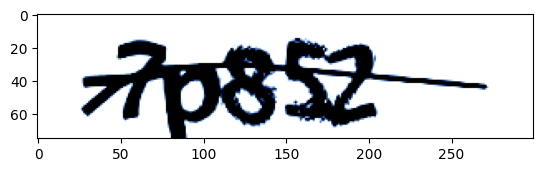

In [32]:
plt.imshow(np.transpose(npimg,(1,2,0)))